In [5]:
from Collabrative_Filtering import collabrative_filtering
from helper import write_submission, csv_parse, submit_results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
alpha = 0.05
beta = 0.02
epsilon = 1e-3
max_iter = 5000
sample = 120

training_dataset = pd.read_csv('./data/data_train_post.csv')
cf = collabrative_filtering(training_dataset, k=5)

final_pred, traces = cf.train(alpha, beta, max_iter, epsilon, sample)

Initial Loss: 3.75590
************************************************************
Iteration: 100, Misfit: 1.47911, Sample: 120
Average time per iteration: 0.2499
************************************************************
Iteration: 200, Misfit: 1.26065, Sample: 120
Average time per iteration: 0.2599
************************************************************
Iteration: 300, Misfit: 1.17518, Sample: 120
Average time per iteration: 0.2886
************************************************************


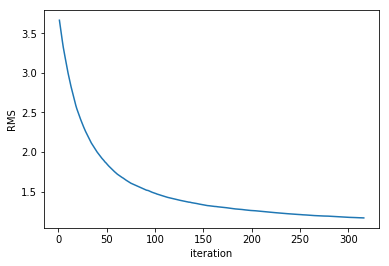

Total number of entries in the submission file: 1176952


In [9]:
plt.plot(traces[:, 0], traces[:,1])
plt.xlabel('iteration')
plt.ylabel('RMS')
plt.show()

write_submission(final_pred)

In [ ]:
# ## Submit the result 
submit_results()